<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/EconomyLeadingIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install finance-dataReader==0.9.11

## Library import & parameters

In [16]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
from datetime import date

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

## Nasdaq Index

            NASDAQCOM
DATE                 
2022-01-24   13855.13
2022-01-25   13539.29
2022-01-26   13542.12
2022-01-27   13352.78
2022-01-28   13770.57
Displaying from 2021-11-08 00:00:00 to 2022-01-28 00:00:00


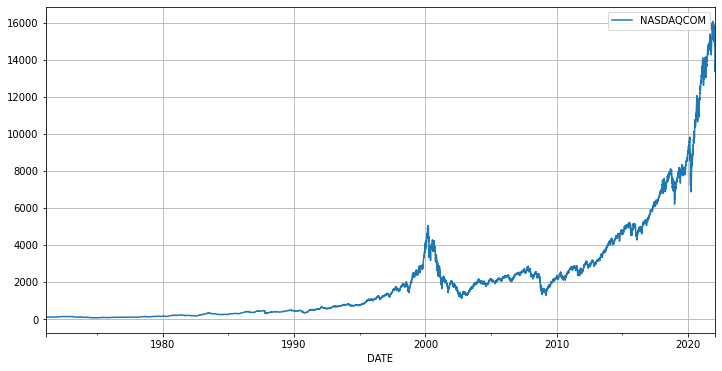

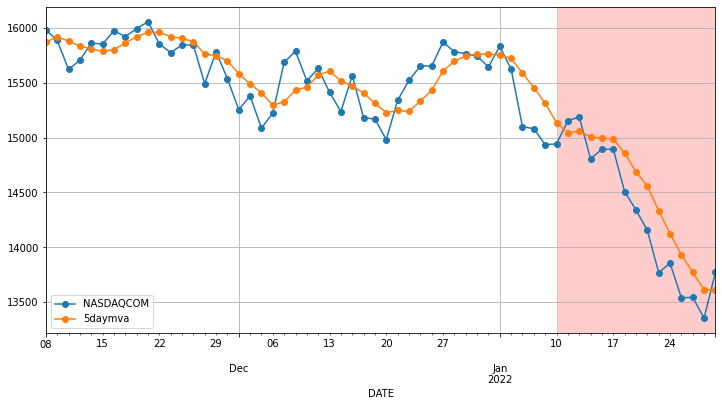

In [127]:
df = fdr.DataReader('NASDAQCOM', data_source='fred')
df.plot()
#print(df.tail())

#add 5 day moving average
#df.info()
df['5daymva'] = df.rolling(5).mean()

#highlight recent data
start_date = df.index[-60]
end_date = df.index[-1] 
highlight_date = df.index[-15]

ax = df[start_date:].plot(marker='o')
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)
print('Displaying from ' + str(start_date) + ' to ' + str(end_date))

##Initial Claims Seasonally Adjusted(ICSA) 
>* from FRED
>*  NASDAQ in the background

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16018 entries, 1970-01-03 to 2022-01-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NASDAQCOM  15961 non-null  float64
 1   ICSA       16018 non-null  float64
dtypes: float64(2)
memory usage: 375.4 KB
None


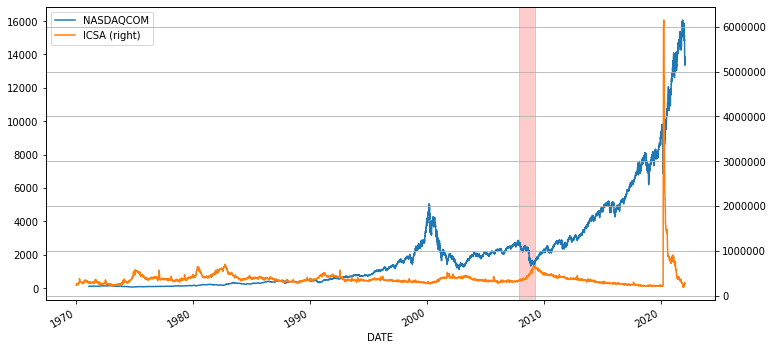

In [65]:
df1 = fdr.DataReader(['NASDAQCOM', 'ICSA'], data_source='fred')
ax = df1.plot(secondary_y='ICSA')

print(df1.info())

#Highlight the financial crisis
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

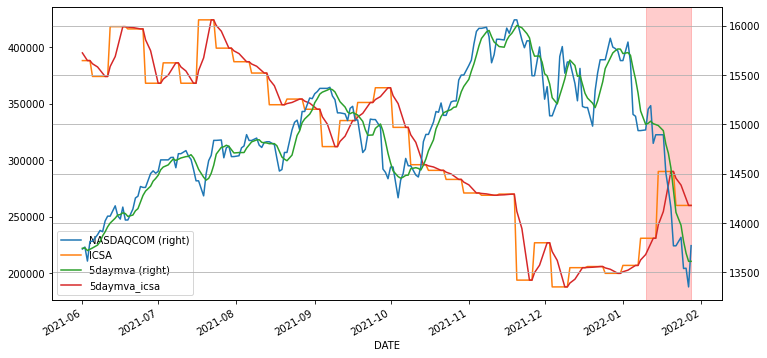

In [93]:
#add 5 day moving average
df1['5daymva'] = df1['NASDAQCOM'].fillna(0).rolling(5).mean()
ax = df1['2021-06':].plot(secondary_y=['NASDAQCOM','5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##Consumer Sentiment (UMCSENT)
https://fred.stlouisfed.org/series/UMCSENT
>* Monthly by Univ of Michigan Consumer Sentiment (UMCSENT) 

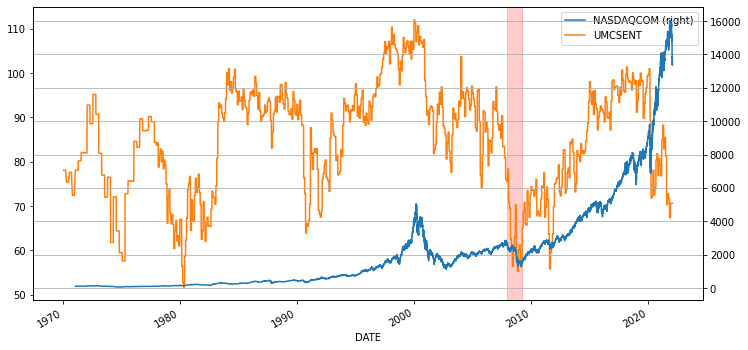

In [70]:
df = fdr.DataReader(['NASDAQCOM', 'UMCSENT'], data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')

#highlight the financial crisis
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

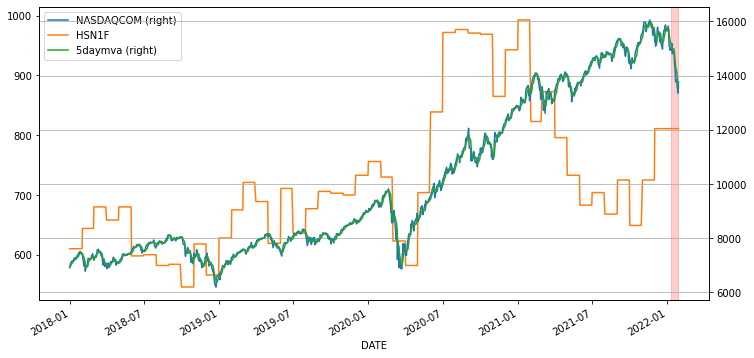

In [88]:
ax = df['2018':].plot(secondary_y=['NASDAQCOM', '5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

New One Family Houses Sold: United States (HSN1F)

https://fred.stlouisfed.org/series/HSN1F
>* Monthly


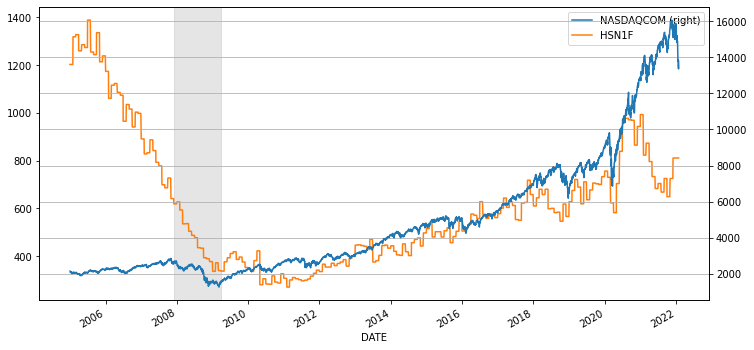

In [83]:
df = fdr.DataReader(['NASDAQCOM', 'HSN1F'], start='2005', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

Index(['NASDAQCOM', 'HSN1F'], dtype='object')


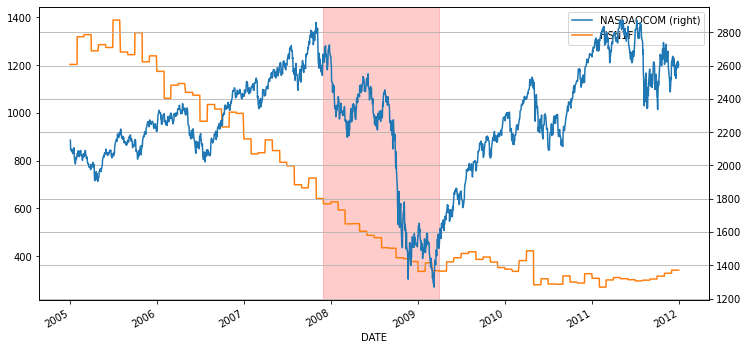

In [84]:
# During the financial crisis
ax = df['2003': '2011'].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

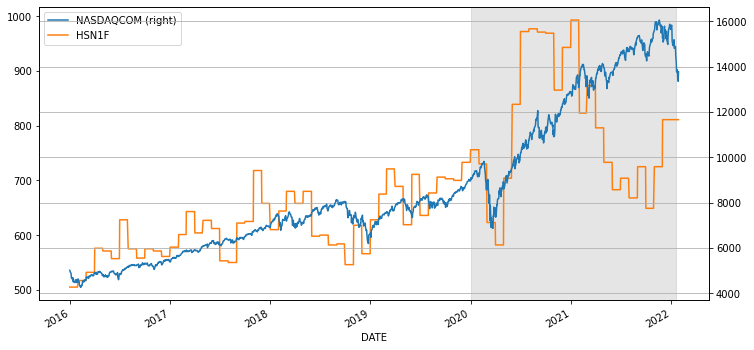

In [85]:
ax = df['2016':].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2020-01-01', '2022-01-19', color='red', alpha=0.2)

##Unemployment rate (UNRATE)

https://fred.stlouisfed.org/series/UNRATE

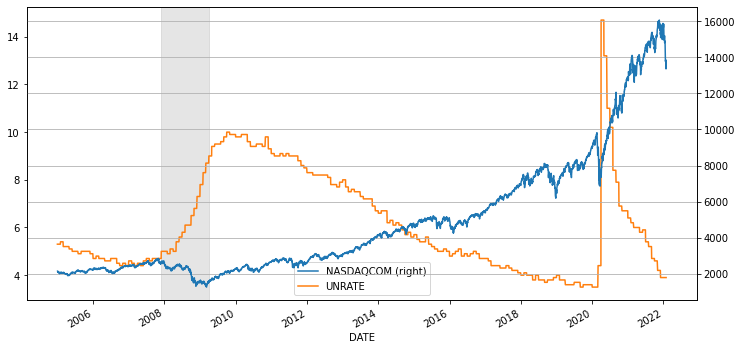

In [100]:
df = fdr.DataReader(['NASDAQCOM', 'UNRATE'], start='2005', data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='gray', alpha=0.2)

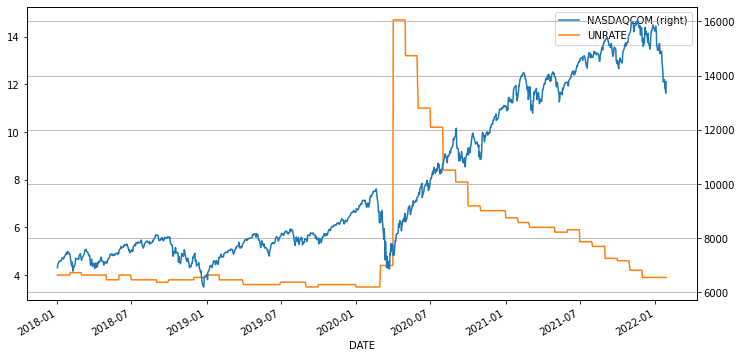

In [101]:
ax = df['2018':].plot(secondary_y='NASDAQCOM')

##M2SL Money stock measures

>* M2 discontinued and replaced by M2SL 

https://fred.stlouisfed.org/series/M2SL

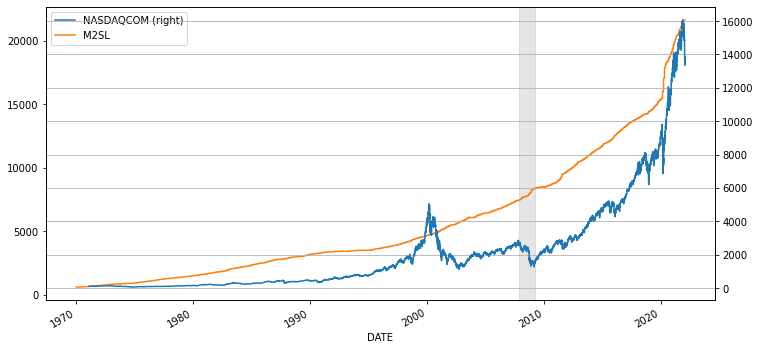

In [107]:
df = fdr.DataReader(['NASDAQCOM', 'M2SL'], data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

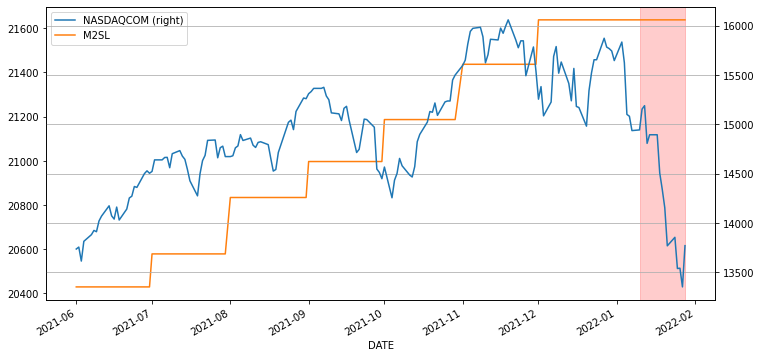

In [114]:
ax = df['2021-06':].plot(secondary_y='NASDAQCOM')
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)

##High yield bond spread (BAMLH0A0HYM2)

https://fred.stlouisfed.org/series/BAMLH0A0HYM2

It is a high risk high yield bond that invests on higher interest rates because they have lower credit ratings than investment-grade bonds. 

High-yield bonds are more likely to default, so they must pay a higher yield than investment-grade bonds to compensate investors. 

From
https://www.investopedia.com/terms/h/high_yield_bond.asp

The spread means the difference to the government bond

When the economy is getting bad, the spread gets larger.

The spread named as 'ICE BofA US High Yield Index Option-Adjusted Spread' is provided from FRED.

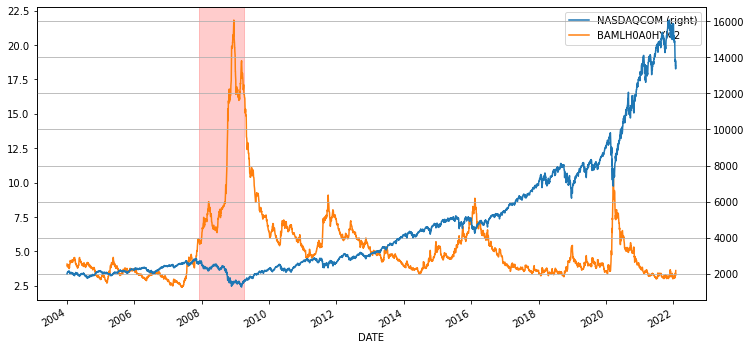

In [118]:
df = fdr.DataReader(['NASDAQCOM', 'BAMLH0A0HYM2'], start='2004-01-01', end=end_date, data_source='fred')
ax = df.plot(secondary_y='NASDAQCOM')
ax = ax.axvspan('2007-12-01', '2009-03-30', color='red', alpha=0.2)

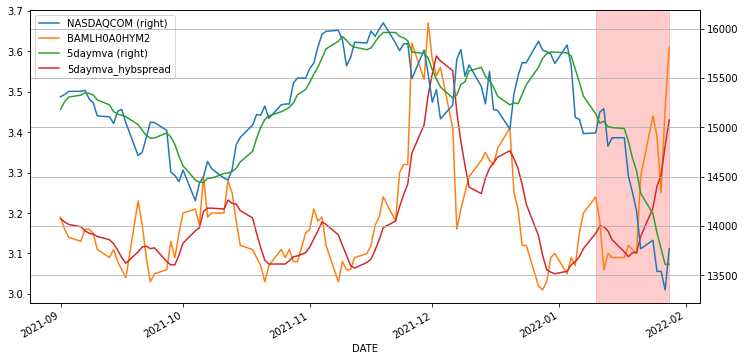

In [121]:
#df['5daymva'] = df['NASDAQCOM']['2021-06-01':].fillna(0).rolling(5).mean()
#df['5daymva_hybspread'] = df['BAMLH0A0HYM2']['2021-06-01':].fillna(0).rolling(5).mean()
ax = df['2021-09-01':].plot(secondary_y=['NASDAQCOM','5daymva'])
ax = ax.axvspan(highlight_date, end_date, color='red', alpha=0.2)